### Abstract
In this issue, we will learn another algorithm of the binary-classification-hard-output: $LDA$ (linear discriminant analysis). Actually, it's also used to reduce the dimension.

We'll select a direction and project the high-dimensional samples to this direction to divide them into two classes.

### Idea
The core idea of $LDA$ is to make the projected data satisfy two conditions:
* the distance between samples within the same class is close
* the distance between different classes is large.

### Algorithm
Firstly, to reduce the dimension, we have to find out how to calculate the projection length.

we assume a sample $x$ and project it to the direction $w$.

As we know: $w\cdot x=||w||*||x||* \cos{\theta}$

Here we assume $||w||=1$ to detemine the unique $w$ to prevent countless solutions caused by scaling.

so $w\cdot x=||x||*\cos{\theta}$

And $||x||*\cos{\theta}$ is exactly the definition of projection.

Therefore, the projection length of the sample on the vector $w$ is $w\cdot x$.

Thus the projection is $z=w^T\cdot x$

We assume the number of samples belonging to the two classes is $N1$,$N2$.

Below, as to the first condition: **the distance of sample within the same class is close**, we use the variance matrix to represent the overall distribution of each class.

Here we use the definitioin of covariance matrix and the covariance matrix of origin data $x$ is denoted as $S$.

\begin{equation}
\begin{aligned}C_1: Var_z[C_1]&=\frac{1}{N_1}\sum_{i=1}^{N_1} (z_i-\overline{z_{c1}})(z_i-\overline{z_{c1}})^T\\
&=\frac{1}{N_1}\sum_{i=1}^{N_1}(w^T x_i-\frac{1}{N_1}\sum_{j=1}^{N_1}w^T x_j)(w^T x_i-\frac{1}{N_1}\sum_{j=1}^{N_1}w^T x_j)^T \\&=w^T \frac{1}{N_1}\sum_{i=1}^{N_1}(x_i-\frac{1}{N_1}\sum_{j=1}^{N_1} x_j)(x_i-\frac{1}{N_1}\sum_{j=1}^{N_1} x_j)^T w\\&=w^{T} \frac{1}{N_{1}} \sum_{i=1}^{N_{1}}\left(x_{i}-\overline{x_{c 1}}\right)\left(x_{i}-\overline{x_{c 1}}\right)^{T} w\\&=w^T S_1 w\\C_2: Var_z[C_2]&=\frac{1}{N_2}\sum_{i=1}^{N_2} (z_i-\overline{z_{c2}})(z_i-\overline{z_{c2}})^T\\&=w^T S_2 w
\end{aligned}
\end{equation}

Therefore the distance between classes can be denoted by:
$$
Var_z[C_1]+Var_z[C_2]=w^T(S_1+S_2)w
$$

As to the second condition: **the distance between different classes is large**

The distance between classes can be denoted by the difference between the mean projection length of two classes.
\begin{equation}
\begin{aligned}
(z_{c1}-z_{c2})^2&=(\frac{1}{N_1}\sum_{i=1}^{N_1}w^T x_i - \frac{1}{N_2}\sum_{i=1}^{N_2}w^T x_i)^2\\
&=(w^T(\frac{1}{N_1}\sum_{i=1}^{N_1} x_i - \frac{1}{N_2}\sum_{i=1}^{N_2} x_i))^2\\
&=(w^T(\overline{x_{c1}}-\overline{x_{c2}}))^2\\
&=w^T(\overline{x_{c1}}-\overline{x_{c2}})(\overline{x_{c1}}-\overline{x_{c2}})^T w
\end{aligned}
\end{equation}

Well, let's look back on our two conditions:
* the distance of samples within the same class is close
* the distance between different classes is large

So it's easy to obtain a intuitive loss function:
\begin{equation}
L(w)=\frac{Var_z[C_1]+Var_z[C_2]}{(z_{c1}-z_{c2})^2}
\end{equation}

Via minimizing the loss function, we can obtain the target $w$:
\begin{equation}
\begin{aligned}
\widehat{w}=argmin(L(w))&=argmin(\frac{Var_z[C_1]+Var_z[C_2]}{(z_{c1}-z_{c2})^2})\\
&=argmin(\frac{w^T(S_1+S_2)w}{w^T(\overline{x_{c1}}-\overline{x_{c2}})(\overline{x_{c1}}-\overline{x_{c2}})^T w})\\
&=argmin(\frac{w^T S_w w}{w^T S_b w})\\
\end{aligned}\end{equation}

In the formula:
\begin{equation}
\begin{aligned}
&S_w: with-class:variance\ within\ the\ class\\
&S_b: between-class:variance\ between\ classes\\
\end{aligned}
\end{equation}

The following is the partial derivative of the above formula:

\begin{equation}
\begin{aligned}
\frac{\partial{L(w)}}{\partial{w}}
&=\frac{\partial}{\partial{w}}(w^T S_w w)(w^T S_b w)^{-1}\\
&=2S_{b} w\left(w^{T} S_{w} w\right)^{-1}-2 w^{T} S_{b} w\left(w^{T} S_{w} w\right)^{-2} S_{w} w=0\\
\end{aligned} \end{equation}

try to transform the equation:
$$
\begin{aligned}
\left(w^{T} S_{b} w\right) S_{w} w&=S_{b} w\left(w^{T} S_{w} w\right)\\
\left(w^{T} S_{b} w\right) w&=S_{w}^{-1}S_{b} w\left(w^{T} S_{w} w\right)
\end{aligned}
$$
Notes: the shape of $w^T S_b w$ and $w^T S_w w$ is : $(1,p)* (p,p)* (p,1)=(1,1)$

Since the two terms are scalars, they only scale the module of a vector and can't change its direction, so the above formula is updated to:
$$
w \propto S_{w}^{-1} S_{b} w=S_{w}^{-1}\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)^{T} w 
$$
And because $\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)^{T} w$ is also a scalae, we obtain the final formula:
$$
\widehat{w}\propto S_{w}^{-1}\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)
$$
So $S_{w}^{-1}\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)$ is the direction we have been seeking, finally we can get the standard $w$ via scaling.

### Implement

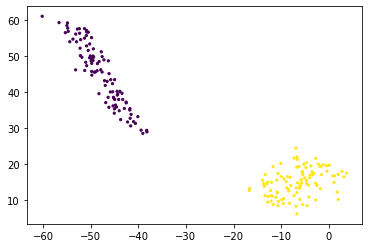

In [1]:
import numpy as np
import os
os.chdir("../")
from models.linear_models import LDA

x = np.linspace(0, 100, num=100)
w1, b1 = 0.1, 10
w2, b2 = 0.3, 30
epsilon = 2
k = 0.2
b = 20
w = np.asarray([-k, 1])
v1 = x * w1 + b1 + np.random.normal(scale=epsilon, size=x.shape)
v2 = x * w2 + b2 + np.random.normal(scale=epsilon, size=x.shape)
x1 = np.c_[x, v1]
x2 = np.c_[x, v2]
l1 = np.ones(x1.shape[0])
l2 = np.zeros(x2.shape[0])
data = np.r_[x1, x2]
label = np.r_[l1, l2]

model = LDA()
model.fit(x1, x2)
model.draw(data, label)